# Task 1.2: Apply Quantum Operations (Part 2)
## Objective 1b: Advanced & Algorithmic Circuit Library

**Overview:**
This notebook covers high-level algorithmic circuits used in Variational Algorithms, Machine Learning, and Optimization.

*   **Advanced Arithmetic:** Comparators, Reciprocals.
*   **Particular Quantum Circuits:** Grover Operator, Phase Estimation and others
*   **N-Local Circuits:** EfficientSU2, RealAmplitudes (Ansatzes).
*   **Oracles & Templates:** Tools for specific algorithms like Grover's.

### Advanced Arithmetic

### **Advanced Building Blocks: Other Arithmetic Functions**

Qiskit's circuit library contains a variety of specialized arithmetic components. These gates and circuits are essential for building quantum algorithms, these functions exist in two forms: abstract `Gate` representations, which describe the mathematical operation for the transpiler to optimize, and concrete `QuantumCircuit` implementations, which are ready-to-use algorithmic blocks.


- **ExactReciprocalGate**:	Implements an exact reciprocal function `f(x) = 1/x`.
- **IntegerComparatorGate**:	Perform a ≥ or < on a qubit register against a classical integer.
- **QuadraticFormGate**:	Implements a quadratic form on binary variables encoded in qubit registers.
- **WeightedSumGate**:	A gate to compute the weighted sum `Σ(wᵢ * xᵢ)` of qubit registers, each variable is multiplied by a specific weight.

- **ExactReciprocal**:	Exact reciprocal `QuantumCircuit` implmentation
- **IntegerComparator**:	Integer Comparator `QuantumCircuit` implmentation.
- **QuadraticForm**:	Quadratic form `QuantumCircuit` implmentation.
- **WeightedAdder**:	Weighted sum `QuantumCircuit` implmentation.

Integer Comparator Circuit:


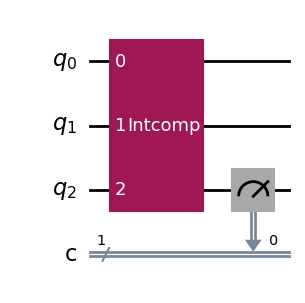

In [61]:
from qiskit.circuit.library import IntegerComparatorGate
from qiskit import QuantumCircuit

# Example 1: Integer Comparator
# Compare if a 2-qubit number (0-3) is < 3 
qc = QuantumCircuit(3, 1)
qc.append(IntegerComparatorGate(2, 3, geq=False), range(3))
#Result is stored in the third qubit (flips if condition is true)
qc.measure(2,0)
print("Integer Comparator Circuit:")
qc.draw('mpl')

Integer Comparator Circuit:


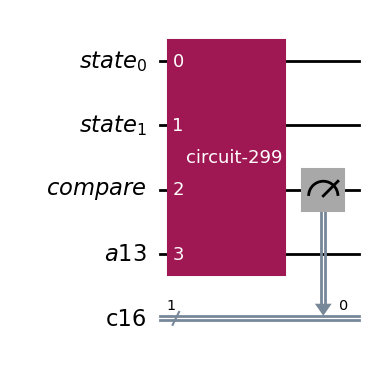

In [59]:
from qiskit.circuit.library import IntegerComparator
from qiskit import ClassicalRegister

# Example 1: Integer Comparator
# Compare if a 2-qubit number (0-3) is < 3 
qc = IntegerComparator(2, 3, geq=False)
qc.add_register(ClassicalRegister(1))
#Result is stored in the third qubit (flips if condition is true)
qc.measure(2,0)
print("Integer Comparator Circuit:")
qc.draw('mpl')

         ┌──────────────┐
state_0: ┤0             ├
         │              │
state_1: ┤1             ├
         │              │
  sum_0: ┤2             ├
         │              │
  sum_1: ┤3             ├
         │  circuit-302 │
  sum_2: ┤4             ├
         │              │
carry_0: ┤5             ├
         │              │
carry_1: ┤6             ├
         │              │
control: ┤7             ├
         └──────────────┘
Weighted Adder Circuit:


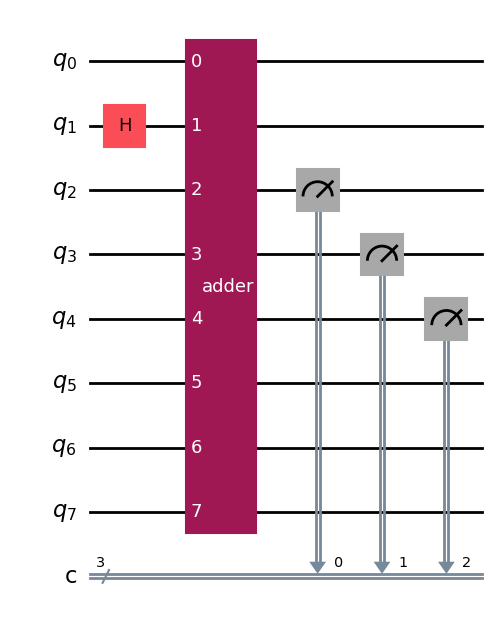

In [60]:
from qiskit.circuit.library import WeightedAdder
from qiskit import QuantumCircuit

# Example 2: Weighted Adder
# Compute weighted sum: 2*x0 + 3*x1
weights = [2, 3]

weighted_adder = WeightedAdder(2, weights=weights)
print(weighted_adder)
qc = QuantumCircuit(weighted_adder.num_qubits, 3)

qc.h(1)
qc.append(weighted_adder, range(weighted_adder.num_qubits))
#Output stored in 3-qubit sum register in qubits 2,3,4
qc.measure(range(2, 5), range(3))
print("Weighted Adder Circuit:")
qc.draw('mpl')

Measurement Output: {'1': 1000}


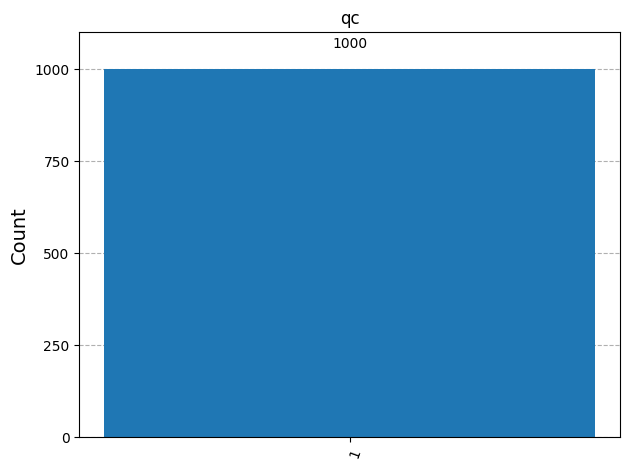

In [62]:
from qiskit import  transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(qc , sim_ideal),shots=1000).result()
#print(result)
counts = result.get_counts(0)
print("Measurement Output:", counts)
plot_histogram(counts, title='qc')



Weighted Adder Circuit as Gate:


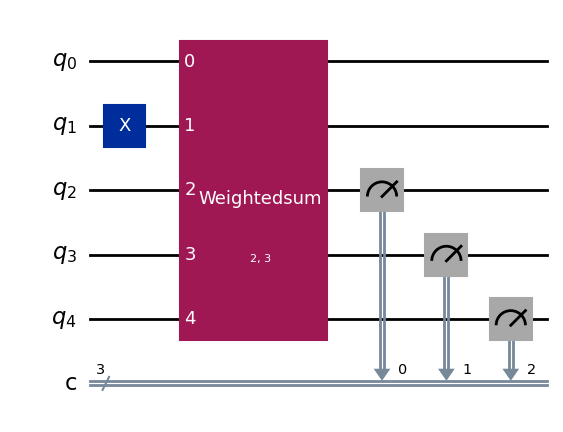

In [55]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import WeightedSumGate

# Example 2: Weighted Adder Gate
# Compute weighted sum: 2*x0 + 3*x1
weights = [2, 3]
weighted_sum_gate=WeightedSumGate(2,weights=weights)
weighted_adder =QuantumCircuit(weighted_sum_gate.num_qubits,3)
# qubit 1 = 1
weighted_adder.x(1)
weighted_adder.append(weighted_sum_gate, weighted_adder.qubits)
print("\nWeighted Adder Circuit as Gate:")
#Output stored in 3-qubit sum register (can represent up to 5)
weighted_adder.measure([2,3,4],[0,1,2])
weighted_adder.draw('mpl')


In [56]:
from qiskit import  transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

sim_ideal = AerSimulator()
result = sim_ideal.run(transpile(weighted_adder , sim_ideal),shots=1000).result()
#print(result)
counts = result.get_counts(0)
print("Measurement Output:", counts)
plot_histogram(counts, title='weighted_adder')


C:\QC\venvs\sandbox\.venv\Lib\site-packages\qiskit\transpiler\passes\synthesis\hls_plugins.py:1951: UserWarning: Cannot synthesize a WeightedSumGate on 2 state qubits with less than 3 clean auxiliary qubits. Only 0 are available. This will likely lead to a error in HighLevelSynthesis.
  warnings.warn(


TranspilerError: 'HighLevelSynthesis is unable to synthesize "WeightedSum"'

### Particular Quantum Circuits

The following gate derive ```Gate```

* fourier_checking -->	Fourier checking circuit.
* hidden_linear_function -->	Circuit to solve the hidden linear function problem.
* iqp -->	Instantaneous quantum polynomial time (IQP) circuit.
* random_iqp -->	A random instantaneous quantum polynomial time (IQP) circuit.
* quantum_volume -->	A quantum volume model circuit.
* phase_estimation -->	Phase Estimation circuit.
* grover_operator -->	Construct the Grover operator.
* unitary_overlap -->	Circuit that returns the overlap between two unitaries U2†U1.
* GraphStateGate -->	A gate representing a graph state.
* PauliEvolutionGate -->	Time-evolution of an operator consisting of Paulis.
* HamiltonianGate -->	Class for representing evolution by a Hamiltonian operator as a gate.

The following gates derive ```QuantumCircuit```

* FourierChecking -->	Fourier checking circuit.
* GraphState -->	Circuit to prepare a graph state.
* HiddenLinearFunction -->	Circuit to solve the hidden linear function problem.
* IQP -->	Instantaneous quantum polynomial (IQP) circuit.
* QuantumVolume -->	A quantum volume model circuit.
* PhaseEstimation -->	Phase Estimation circuit.
* GroverOperator -->	The Grover operator.
* UnitaryOverlap -->	Circuit that returns the overlap between two unitaries U2†U1​.

In [ ]:
from qiskit.circuit.library import IQP

#iqp=IQP(interactions)
#qc.compose(iqp).draw('mpl')

### N Local Circuits 

return a parameterized ```QuantumCircuit``` to use as ansatz in variational quantum circuits


The following gates derive ```QuantumCircuit```

* n_local -->	Construct an n-local variational circuit.
* efficient_su2 -->	The hardware-efficient SU(2)SU(2) 2-local circuit.
* real_amplitudes -->	Construct a real-amplitudes 2-local circuit.
* pauli_two_design -->	Construct a Pauli 2-design ansatz.
* excitation_preserving -->	The heuristic excitation-preserving wave function ansatz.
* qaoa_ansatz -->	A generalized QAOA quantum circuit with a support of custom initial states and mixers.
* hamiltonian_variational_ansatz -->	Construct a Hamiltonian variational ansatz.
* evolved_operator_ansatz -->	Construct an ansatz out of operator evolutions.

The following gates derive ```BlueprintCircuit``` which wrap the circuits into a block and allow for inplace mutations of the circuits

* NLocal -->	The n-local circuit class.
* TwoLocal -->	The two-local circuit.
* PauliTwoDesign -->	The Pauli Two-Design ansatz.
* RealAmplitudes -->	The real-amplitudes 2-local circuit.
* EfficientSU2 -->	The hardware efficient SU(2) 2-local circuit.
* EvolvedOperatorAnsatz -->	The evolved operator ansatz.
* ExcitationPreserving -->	The heuristic excitation-preserving wave function ansatz.
* QAOAAnsatz -->	A generalized QAOA quantum circuit with a support of custom initial states and mixers.

In [ ]:
from qiskit.circuit.library import real_amplitudes
 
ansatz = real_amplitudes(5, entanglement="pairwise")

from qiskit.circuit.library import zz_feature_map
num_qubits = 5
qc = zz_feature_map(num_qubits)
qc.barrier()
qc.compose(ansatz, inplace=True)
 
qc.draw("mpl")

### Data Encoding Ciruicts



return a parameterized QuantumCircuit to use in data encoding circuits in variational quantum algorithms

The following gates derive ```QuantumCircuit```


* pauli_feature_map --> The Pauli expansion circuit.
* z_feature_map --> The first order Pauli Z-evolution circuit. 
* zz_feature_map --> Second-order Pauli-Z evolution circuit.

The following gates derive ```BlueprintCircuit``` which wrap the circuits into a block and allow for inplace mutations of the circuits

* PauliFeatureMap -->	The Pauli Expansion circuit.
* ZFeatureMap -->	The first order Pauli Z-evolution circuit.
* ZZFeatureMap -->	Second-order Pauli-Z evolution circuit.


In [ ]:
# Example

### Data Prepration Circuits

* StatePrepration --> Complex amplitude state preparation.
* Initialize --> Complex amplitude initialization.

In [ ]:
# Example

### Oracles

black-box operations on quantum circuits

```Gate``` Version Gates

* PhaseOracleGate --> implements a phase oracle.
* BitFlipOracleGate --> implements a bitflip oracle

```QuantumCircuit``` version Gate

* PhaseOracle --> phase oracle

In [ ]:
# Example

### Template Circuits

They are used in circuit optimization

* NCT (Not-CNot-toffoli) --> XGate, CXGate, CCXGate
    * template_nct_2a_1
    * template_nct_2a_2
    * template_nct_2a_3
    * template_nct_4a_1
    * template_nct_4a_2
    * template_nct_4a_3
    * template_nct_4b_1
    * template_nct_4b_2
    * template_nct_5a_1
    * template_nct_5a_2
    * template_nct_5a_3
    * template_nct_5a_4
    * template_nct_6a_1
    * template_nct_6a_2
    * template_nct_6a_3
    * template_nct_6a_4
    * template_nct_6b_1
    * template_nct_6b_2
    * template_nct_6c_1
    * template_nct_7a_1
    * template_nct_7b_1
    * template_nct_7c_1
    * template_nct_7d_1
    * template_nct_7e_1
    * template_nct_9a_1
    * template_nct_9c_1
    * template_nct_9c_2
    * template_nct_9c_3
    * template_nct_9c_4
    * template_nct_9c_5
    * template_nct_9c_6
    * template_nct_9c_7
    * template_nct_9c_8
    * template_nct_9c_9
    * template_nct_9c_10
    * template_nct_9c_11
    * template_nct_9c_12
    * template_nct_9d_1
    * template_nct_9d_2
    * template_nct_9d_3
    * template_nct_9d_4
    * template_nct_9d_5
    * template_nct_9d_6
    * template_nct_9d_7
    * template_nct_9d_8
    * template_nct_9d_9
    * template_nct_9d_10    
* Clifford --> Cllifford Gates
    * clifford_2_1
    * clifford_2_2
    * clifford_2_3
    * clifford_2_4
    * clifford_3_1
    * clifford_4_1
    * clifford_4_2
    * clifford_4_3
    * clifford_4_4
    * clifford_5_1
    * clifford_6_1
    * clifford_6_2
    * clifford_6_3
    * clifford_6_4
    * clifford_6_5
    * clifford_8_1
    * clifford_8_2
    * clifford_8_3
* RZX --> RZXGate
    * rzx_yz
    * rzx_xz
    * rzx_cy
    * rzx_zz1
    * rzx_zz2
    * rzx_zz3

In [ ]:
from qiskit.circuit.library.templates import template_nct_4b_1
from qiskit.quantum_info import Operator
import numpy as np
 
template = template_nct_4b_1()
 
identity = np.identity(2 ** len(template.qubits), dtype=complex)
data = Operator(template).data
np.allclose(data, identity)  # True, template_nct_4b_1 is the identity